# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [54]:
import_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/BIDS_AD_DBS_FORNIX/connectivity_data/vta_published_t_connectivity'
file_target = '*T*'
file_column = None

In [55]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=file_column, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/BIDS_AD_DBS_FORNIX/connectivity_data/vta_published_t_connectivity/*T*


,116_vat_seed_compound_fMRI_efield_func_seed_T.nii,1203_vat_seed_compound_fMRI_efield_func_seed_T.nii,139_vat_seed_compound_fMRI_efield_func_seed_T.nii,147_vat_seed_compound_fMRI_efield_func_seed_T.nii,135_vat_seed_compound_fMRI_efield_func_seed_T.nii,101_vat_seed_compound_fMRI_efield_func_seed_T.nii,150_vat_seed_compound_fMRI_efield_func_seed_T.nii,122_vat_seed_compound_fMRI_efield_func_seed_T.nii,1202_vat_seed_compound_fMRI_efield_func_seed_T.nii,146_vat_seed_compound_fMRI_efield_func_seed_T.nii,...,128_vat_seed_compound_fMRI_efield_func_seed_T.nii,107_vat_seed_compound_fMRI_efield_func_seed_T.nii,133_vat_seed_compound_fMRI_efield_func_seed_T.nii,141_vat_seed_compound_fMRI_efield_func_seed_T.nii,110_vat_seed_compound_fMRI_efield_func_seed_T.nii,125_vat_seed_compound_fMRI_efield_func_seed_T.nii,106_vat_seed_compound_fMRI_efield_func_seed_T.nii,129_vat_seed_compound_fMRI_efield_func_seed_T.nii,111_vat_seed_compound_fMRI_efield_func_seed_T.nii,140_vat_seed_compound_fMRI_efield_func_seed_T.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [56]:
pre = ''
post = '_vat'

In [57]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,116,1203,139,147,135,101,150,122,1202,146,...,128,107,133,141,110,125,106,129,111,140
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- Do NOT enter strings for categorical variables. All data must be numerical
- If you need to standardize or otherwise change you data, do it elsewhere first. 

|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [58]:
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'
sheet='master_list_proper_subjects'

Where do you want to save your data

In [79]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/r_maps/pearson/ad'

In [80]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,211,58.7,NaN,NaN,NaN,NaN,-0.415745,-0.189000,19.900000,19.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,152,69.4,NaN,NaN,NaN,NaN,-0.701419,-0.455000,17.900000,17.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,208,79.2,NaN,NaN,NaN,NaN,-0.929958,-0.669000,16.300000,16.300000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,223,71.1,NaN,NaN,NaN,NaN,-0.829972,-0.575000,17.000000,17.000000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Optional - Handle NANs
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [81]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [82]:
drop_list = ['Percent_Cognitive_Improvement']

In [83]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,86,57.0,NaN,0.598787,-0.099428,0.000000,-0.087220,-0.621000,22.200000,22.200000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,87,65.0,NaN,0.598787,-0.099428,0.000000,0.598397,0.173000,27.000000,27.000000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,88,65.0,NaN,5.854050,2.637141,15.384615,0.269872,-0.207000,24.700000,24.700000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,89,67.0,NaN,0.598787,-0.099428,0.000000,-0.158639,-0.694000,21.700000,21.700000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Optional - Drop Row Based on Value of Column

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [84]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [85]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'Toronto' # The value to drop if T

In [86]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
5,106,66.0,-0.705128,-0.028151,-0.028151,-38.461538,-0.489205,-0.489205,23.553077,63.323903,...,1.0,No,-1.114269,1.114269,0.12,0.88,15.816634,17.617107,-0.597423,-0.388183
6,107,64.0,-0.282051,0.435498,0.435498,-15.384615,-1.718309,-1.718309,19.831365,53.317851,...,0.0,No,-1.114269,1.114269,0.12,0.88,15.524025,13.452311,-0.688373,-1.507246
7,108,60.0,-0.534722,0.158596,0.158596,-29.166667,-1.145694,-1.145694,21.565235,57.979468,...,1.0,No,0.816622,-0.816622,0.56,0.44,16.546984,13.932696,-0.370413,-1.378169
8,109,72.0,-0.557971,0.133118,0.133118,-30.434783,-0.043697,-0.043697,24.902068,66.950749,...,1.0,No,0.641086,-0.641086,0.52,0.48,19.669539,21.341523,0.600149,0.612551
9,110,72.0,-1.551282,-0.955451,-0.955451,-84.615385,0.240855,0.240855,25.763689,69.267271,...,1.0,No,-1.114269,1.114269,0.12,0.88,18.295718,19.263977,0.173133,0.054323


Optional - Miscellaneous Manipulations to Data
- Code as needed

In [87]:
# import numpy as np
# data_df = data_df[data_df['StandardDeviation'] != 0]
# data_df['inverse_variance'] = 1/((data_df['StandardDeviation']/100)**2)
# data_df['weighted_outcome'] = data_df['Outcome']*data_df['inverse_variance']
# # # data_df
# # data_df = data_df[data_df['Generalized'] != 0]
# # data_df


Optional - Regress out Covariates

In [88]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model.
# dependent_variable_list = ['Z_Scored_Percent_Cognitive_Improvement']
# regressors = ['Generalized', 'Focal', 'Multifocal', 'Multiple', 'CertaintyWeight']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Choose Rows to Keep

In [89]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [90]:
col_to_keep_list = ['Percent_Cognitive_Improvement', 'subject']

 Should Now look like: 
- The extra rows will be used as covariates
 
|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [91]:
data_df=data_df.loc[:, col_to_keep_list].T
data_df.columns = data_df.loc['subject', :]
data_df = data_df.drop('subject')
data_df.dropna(inplace=True, axis=1)
data_df

subject,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,...,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0
Percent_Cognitive_Improvement,-21.428571,-36.363636,-78.947368,-129.411765,-10.526316,-38.461538,-15.384615,-29.166667,-30.434783,-84.615385,...,0.0,5.555556,6.25,-61.538462,5.555556,-54.545455,-4.761905,-207.692308,-90.0,13.636364


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [92]:
mask_path = '/Users/cu135/hires_backdrops/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [93]:
method = 'pearson'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [94]:
max_stat_method = 'pseudo_var_smooth'

In [95]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                          variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path, out_dir=out_dir, 
                          method=method, max_stat_method=max_stat_method, vectorize=True)

calvin_fwe.run(n_permutations=1000, debug=False)

Permuting: 100%|██████████| 1000/1000 [00:28<00:00, 35.33it/s]


95th percentile of permuted statistic:  0.5317444030621225
Image saved to: 
 /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/r_maps/pearson/ad
Image saved to: 
 /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/r_maps/pearson/ad
Image saved to: 
 /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/r_maps/pearson/ad


Visualize the FWE Corrected Image


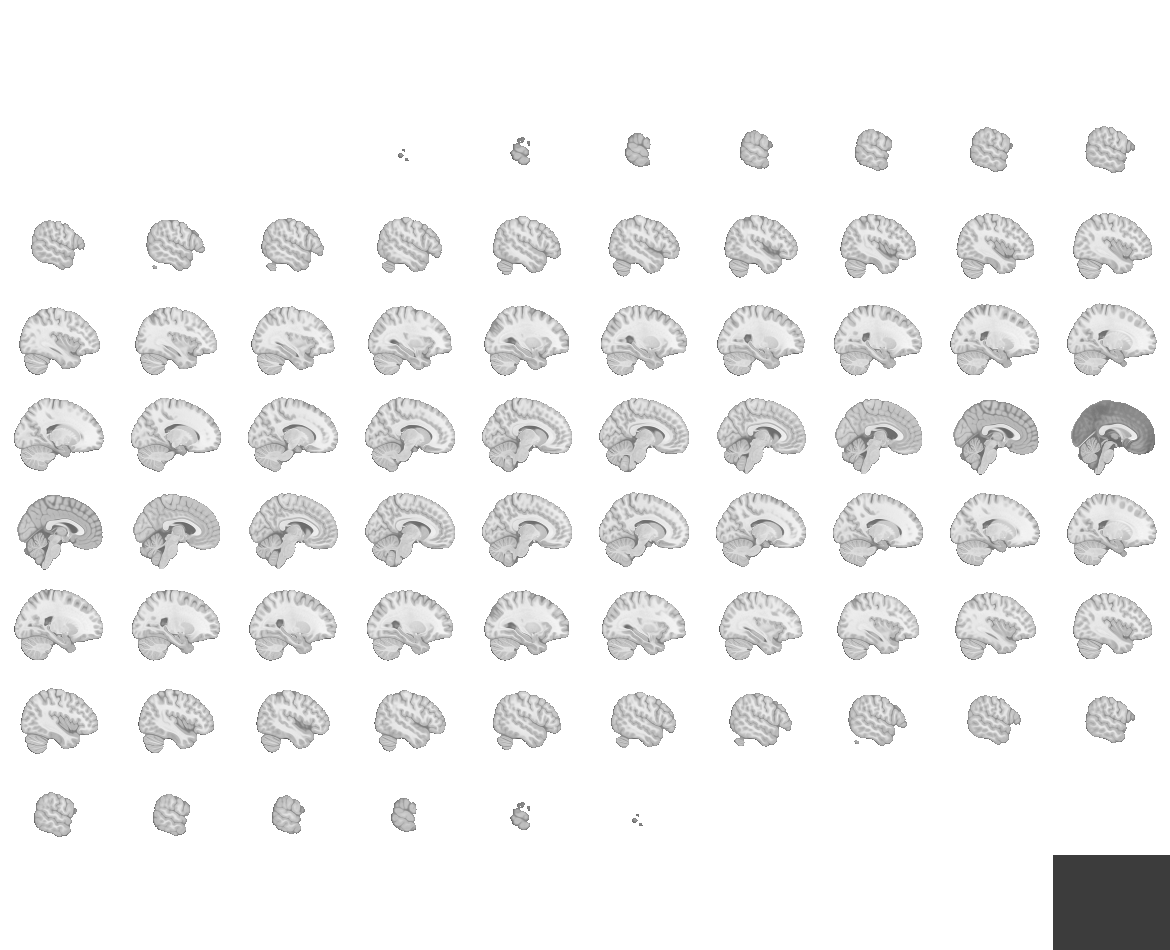
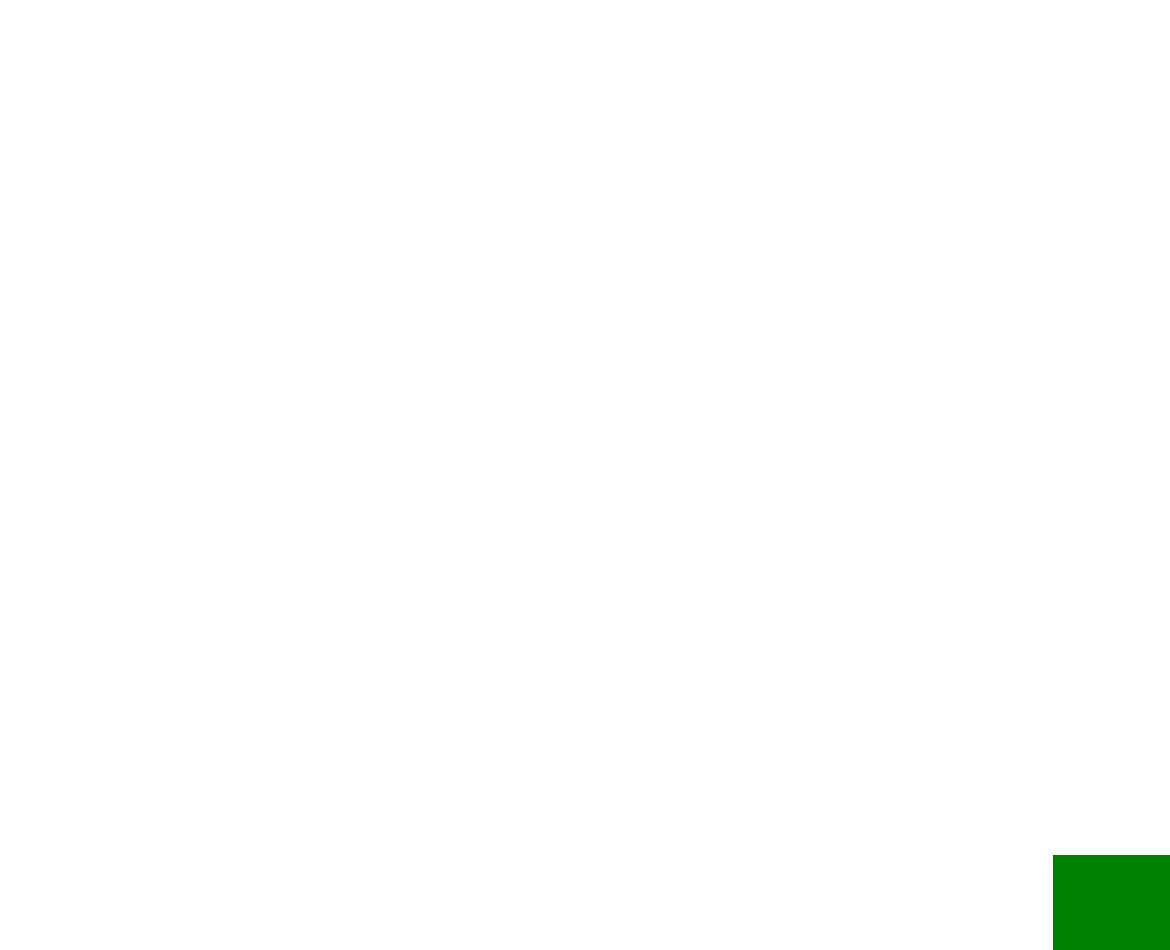

In [96]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


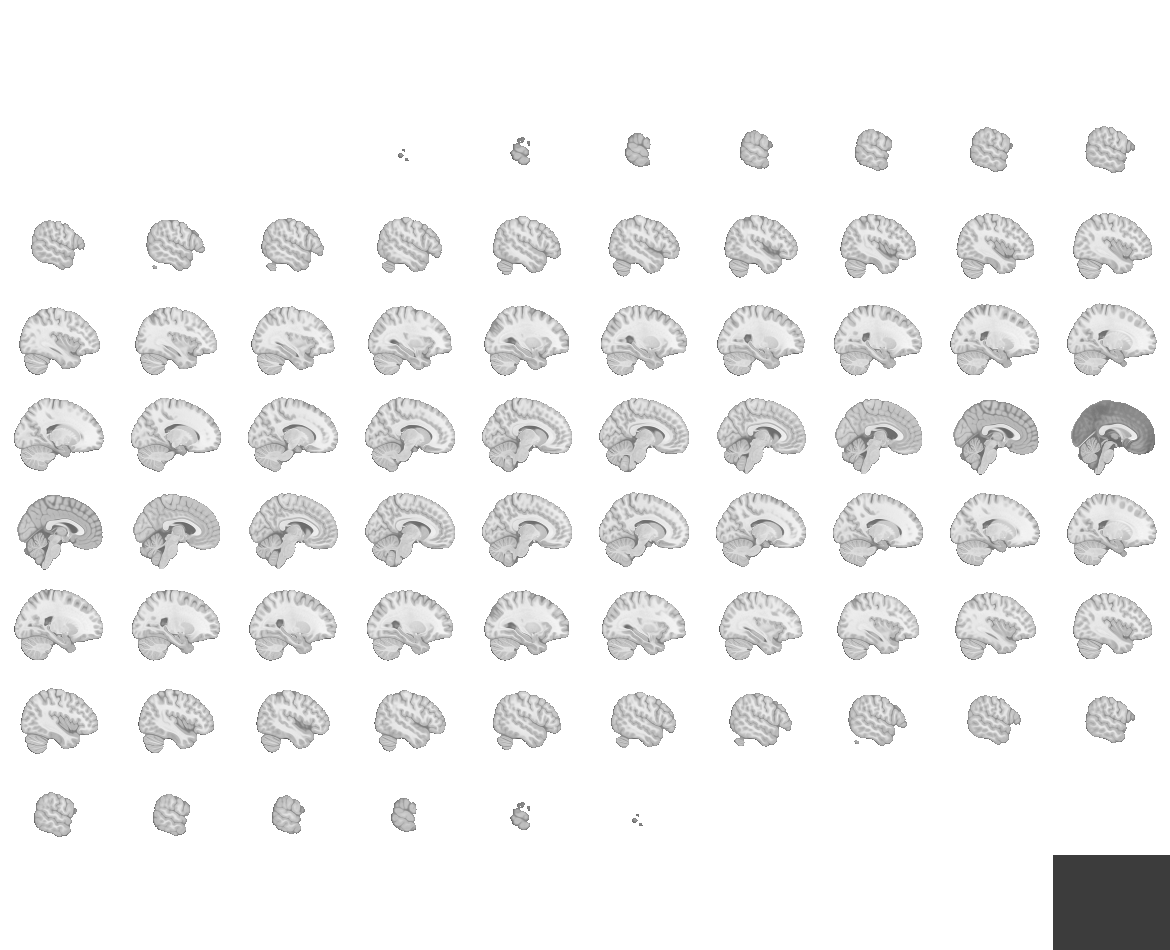
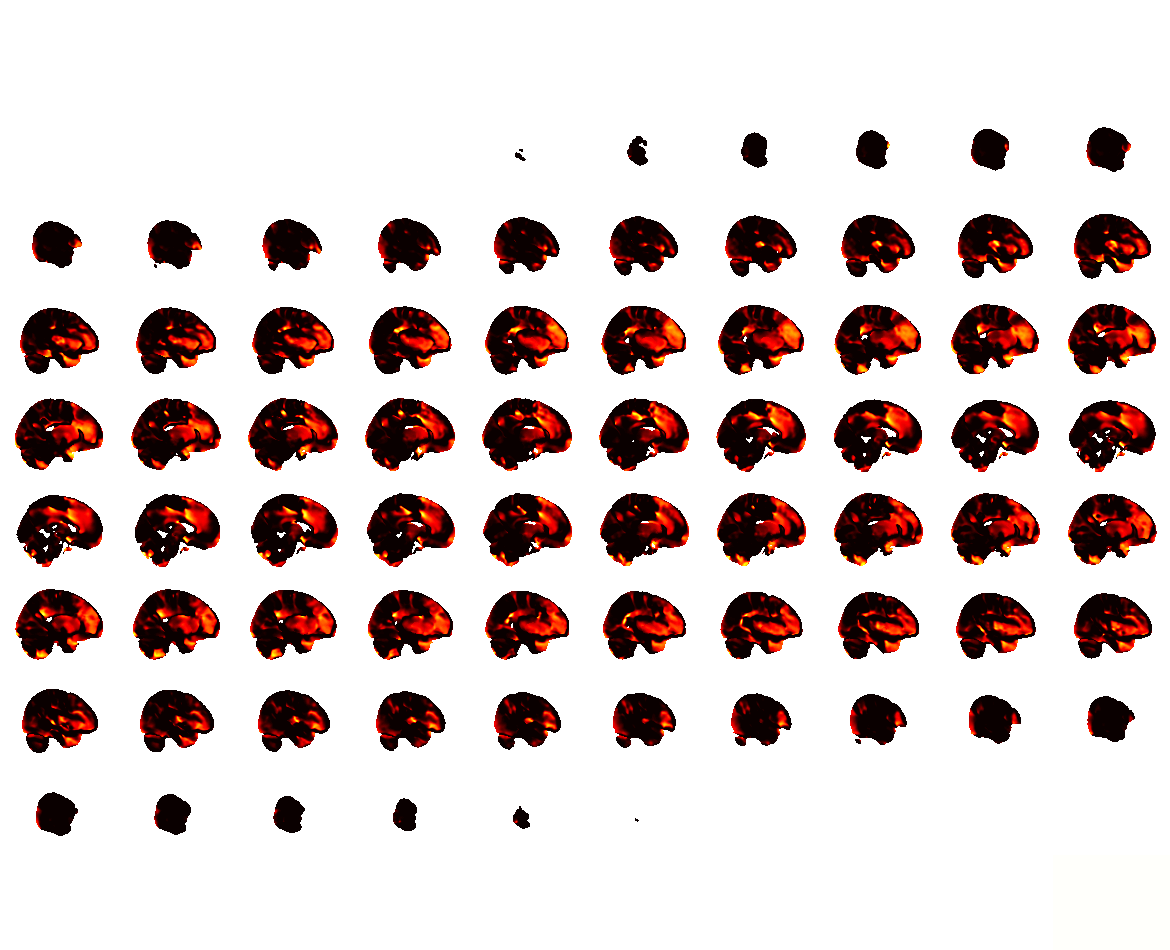

In [97]:
calvin_fwe.p_img

Visualize the Uncorrected Image


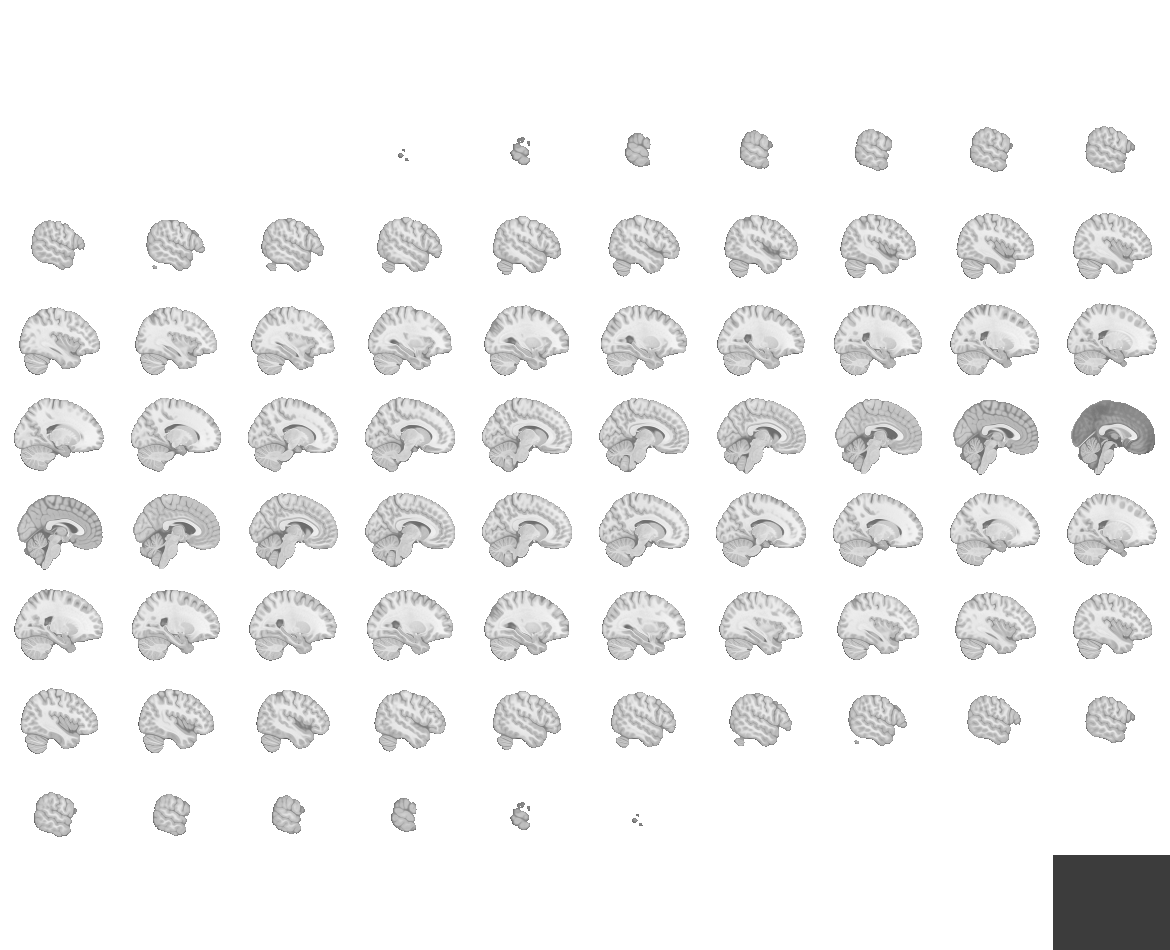
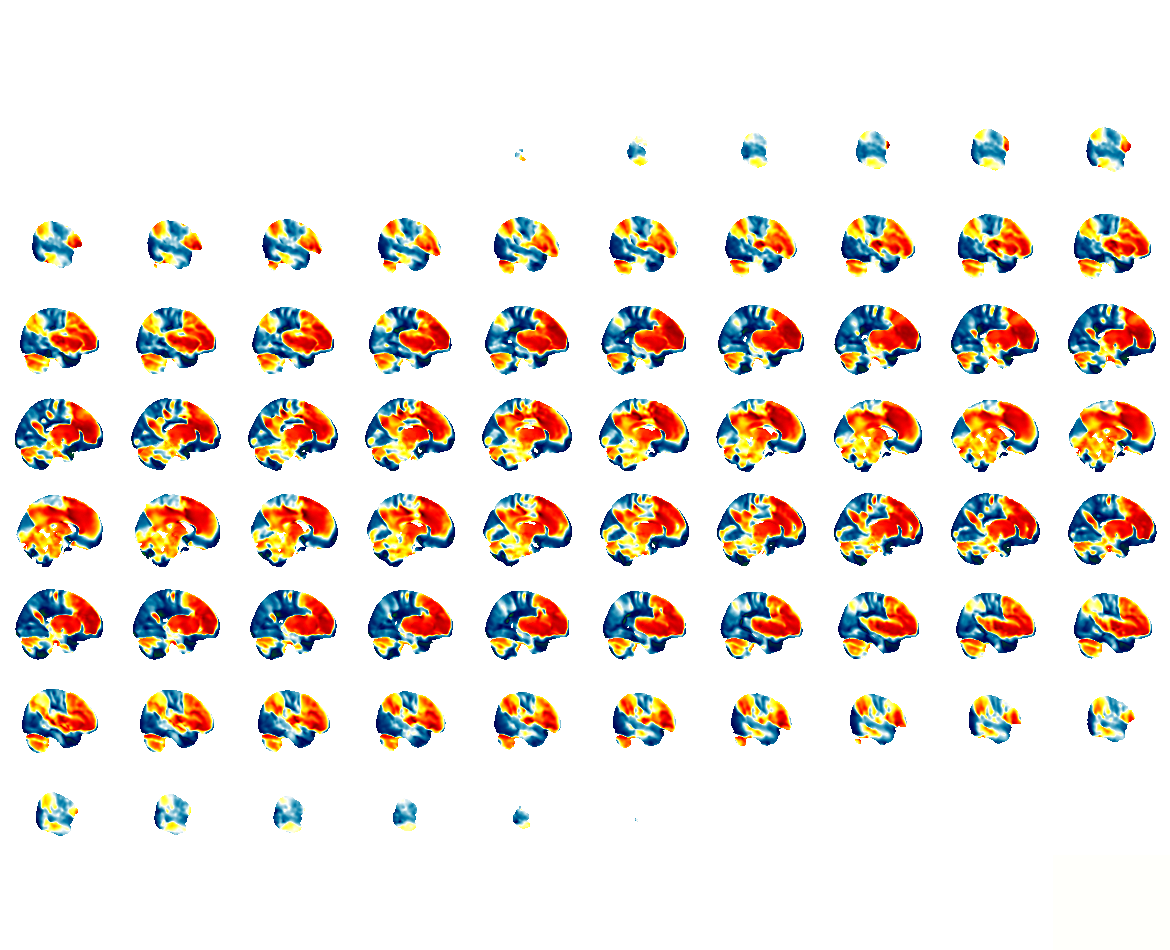

In [98]:
calvin_fwe.uncorrected_img